<a href="https://colab.research.google.com/github/simodepth96/Data-Science-Portfolio/blob/main/EURO_2024_Italy_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EURO 2024 - Italy Stats

> Made by [![Follow](https://img.shields.io/twitter/follow/SimoneDePalma2?style=social)](https://www.linkedin.com/in/simodepth96/)
> Follow me [![Follow](https://img.shields.io/badge/LinkedIn-Follow-blue?style=social&logo=linkedin)](https://www.linkedin.com/in/simodepth96/)

---
In this project, I explored the performances of the Italian International team throughout the entire EURO 2024 tournament.

The EDA (Exploratory Data Analysis) is divided into two sections:
1. **Players & Roles** - This is an exploratory analysis of the performances of each Italian football player based on their role on the pitch throughout the tournament.

2. **Italy International Performances** - This is an exploratory analysis focusing on the overall performance of the Italian team at EURO 2024. The study examines in-depth metrics across various dimensions such as passes, possession, shooting, defense, and more.

##Purpose of the analysis
The purpose of this analysis is to identify patterns in the Italian team's performances at EURO 2024 to help formulate the right questions to understand the reasons behind the unexpected elimination from the tournament.

##Important Notes
1. Due to the descriptive scope of the study, assumptions of inference or causation among events will not be made.
2. Please note that this study may be affected by judgmental errors and may not be entirely accurate. The motives that inspired each EDA task may have been influenced by confirmation and outcome biases or heuristic thinking.
3. Above all, please bear in mind that this is a practical exercise conducted by an aspiring data analyst.





##Methodology

The analysis has been conducted using a data-informed, disciplined approach, which can be summarized in the following bullet points:

1. **Data collection**. [fbref](https://fbref.com/) has been used as the data source. Datasets were scraped using either pandas or the traditional BeautifulSoup Python scraper.
2. **Data pre-processing/wrangling** - Once uploaded onto the notebook, extensive data pre-processing was conducted. Please note that on some occasions, data was pre-processed and wrangled beforehand due to the lack of support for certain tasks from Python.
3. **Univariate Analysis** - Once pre-processed, selected variables were described to identify potential patterns. This section includes a deep dive into central tendency measures.
4. **Bivariate Analysis** - In this section, relationships were detected to identify the potential influence of one variable on another.
3. **Data visualization** - Complementary to the above sections, data visualization tools were used throughout the notebook to continuously investigate relationships between categorical and numerical variables. The process included using catplots, heatmaps, pairplots, and scatterplots.

In [1]:
#@title Install and import libraries
%%capture
!pip install adtk advertools -q plotly --upgrade adviz
!pip install lets-plot -U
!pip install pytimetk

import pytimetk as tk
import pandas as pd
import numpy as np
from IPython.display import display_html
import matplotlib as mpl
from cycler import cycler
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import advertools as adv
import adviz
from plotly.subplots import make_subplots
import plotly.graph_objects as go
#import kaleido.scopes.plotly as kaleido
from webcolors import hex_to_rgb
import plotly.express as px

#to reset the original pandas tables rendering
from google.colab import data_table
data_table.disable_dataframe_formatter()
import datetime
from pandas.api.types import CategoricalDtype

from lets_plot import *
from lets_plot.mapping import as_discrete

LetsPlot.setup_html()

# apply some cool styling
plt.style.use("ggplot")
mpl.rcParams['figure.figsize'] = (12, 6)
mpl.rcParams['lines.linestyle'] = '--'


In [17]:
#@title Import Dataset
main = 'https://fbref.com/en/squads/998c5958/Italy-Men-Stats#all_stats_standard'
html = pd.read_html(main)
main = html[0]

In [18]:
#@title Data Wrangling

# Remove the first row
main.columns = main.iloc[0]
main = main[1:]

# Reset the index
main.reset_index(drop=True, inplace=True)

# Set headers
custom_headers = [
    "Player", "Pos", "Age", "Matches Played", "Starts", "Min", "90s", "Gls", "Ast",
    "G+A", "Non-Penalty Goals", "Penalty Kicks Made", "Penalty Kicks Attempted", "Yellow Cards", "Red Cards", "Expected Goals", "Non-Penalty xG", "Exp. Assisted Goals", "Non-Penalty Expected Goals plus Assisted Goals",
    "Progressive Carries", "Progressive Passes", "Progressive Passes Rec", "Goals/90", "Assists/90", "G+A", "G-PK", "G+A-PK", "xG", "xAG",
    "xG+xAG", "npxG", "npxG+xAG", "Matches"
]
main.columns = custom_headers
main.drop(columns=["Starts", "Min", "90s", "Progressive Carries", "Progressive Passes", "Progressive Passes Rec", "Goals/90", "Assists/90", "G+A", "G-PK", "G+A-PK", "xG", "xAG",
    "xG+xAG", "npxG", "npxG+xAG", "Matches"], inplace=True)

#drop the last 2 rows of the dataset
main = main.iloc[:-2]

# Split the 'Age' column by hyphen
age_split = main['Age'].str.split('-', expand=True)
age_split.columns = ['age', 'Age_End']

# Split the 'Pos' column by comma
pos_split = main['Pos'].str.split(',', expand=True)
pos_split.columns = ['Position', 'Pos2']

# Concatenate the split columns back into the original DataFrame
main = pd.concat([main, age_split, pos_split], axis=1)

# Select relevant columns to keep
main = main[['Player', 'Position', 'Pos2', 'age', 'Age_End', 'Gls', 'Ast', 'Non-Penalty Goals',
             'Penalty Kicks Made', 'Penalty Kicks Attempted', 'Yellow Cards', 'Red Cards',
             'Expected Goals', 'Non-Penalty xG', 'Exp. Assisted Goals',
             'Non-Penalty Expected Goals plus Assisted Goals']]

# Drop the unnecessary columns after splitting and concatenating
main.drop(columns=['Pos2', 'Age_End'], inplace=True)

# Replace all NaN values with 0
main.fillna(0, inplace=True)

#converting float64 to integers
main['Gls'] = main['Gls'].astype(int)
main['Ast'] = main['Ast'].astype(int)
main['Non-Penalty Goals'] = main['Non-Penalty Goals'].astype(int)
main['Penalty Kicks Made'] = main['Penalty Kicks Made'].astype(int)
main['Penalty Kicks Attempted'] = main['Penalty Kicks Attempted'].astype(int)
main['Yellow Cards'] = main['Yellow Cards'].astype(int)
main['Red Cards'] = main['Red Cards'].astype(int)

main


,Player,Position,age,Gls,Ast,Non-Penalty Goals,Penalty Kicks Made,Penalty Kicks Attempted,Yellow Cards,Red Cards,Expected Goals,Non-Penalty xG,Exp. Assisted Goals,Non-Penalty Expected Goals plus Assisted Goals
0,Giovanni Di Lorenzo,DF,30,0,0,0,0,0,0,0,0.2,0.2,0.0,0.2
1,Gianluigi Donnarumma,GK,25,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0
2,Nicolò Barella,MF,27,1,0,1,0,0,1,0,0.1,0.1,0.3,0.4
3,Riccardo Calafiori,DF,22,0,1,0,0,0,2,0,0.3,0.3,0.2,0.5
4,Federico Chiesa,FW,26,0,0,0,0,0,0,0,0.2,0.2,0.3,0.4
5,Gianluca Scamacca,FW,25,0,0,0,0,0,0,0,0.6,0.6,0.2,0.8
6,Federico Dimarco,DF,26,0,0,0,0,0,0,0,0.0,0.0,0.3,0.3
7,Lorenzo Pellegrini,FW,28,0,1,0,0,0,1,0,0.5,0.5,0.5,1.0
8,Jorginho,MF,32,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
9,Davide Frattesi,MF,24,0,0,0,0,0,0,0,0.3,0.3,0.0,0.3


#Understanding the big picture

In this phase we are concerned in understanding what the dataset is composed of.




In [12]:
#@title Size of the dataset: number of columns + length of dataset
print(main.shape)

(25, 14)


In [72]:
#@title Visualize the last part of the dataset
main.tail()

,Player,Position,age,Gls,Ast,Non-Penalty Goals,Penalty Kicks Made,Penalty Kicks Attempted,Yellow Cards,Red Cards,Expected Goals,Non-Penalty xG,Exp. Assisted Goals,Non-Penalty Expected Goals plus Assisted Goals
20,Raoul Bellanova,DF,24,0,0,0,0,0,0,0,0,0,0,0
21,Alessandro Buongiorno,DF,25,0,0,0,0,0,0,0,0,0,0,0
22,Federico Gatti,DF,26,0,0,0,0,0,0,0,0,0,0,0
23,Alex Meret,GK,27,0,0,0,0,0,0,0,0,0,0,0
24,Guglielmo Vicario,GK,27,0,0,0,0,0,0,0,0,0,0,0


In [75]:
#@title basic summary statistics on the dataset
main.describe().round(1)

,Gls,Ast,Non-Penalty Goals,Penalty Kicks Made,Penalty Kicks Attempted,Yellow Cards,Red Cards,Expected Goals,Non-Penalty xG,Exp. Assisted Goals,Non-Penalty Expected Goals plus Assisted Goals
count,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
mean,0.1,0.1,0.1,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0
std,0.3,0.3,0.3,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0


#Preparation

This phase introduces a few questions about the need to clean the dataset from anything that may result redundant to our analysis.

1. **are there any useless or redundant variables?**
2. **are there any duplicate columns?**
3. **does the nomenclature make sense?**
4.**are there any new variables we want to create?**


In [76]:
#@title Check for Duplicate rows
main.duplicated().sum()

0

#Univariate Analysis

After describing the dataset in its entirety,now it's time to **describe variables**




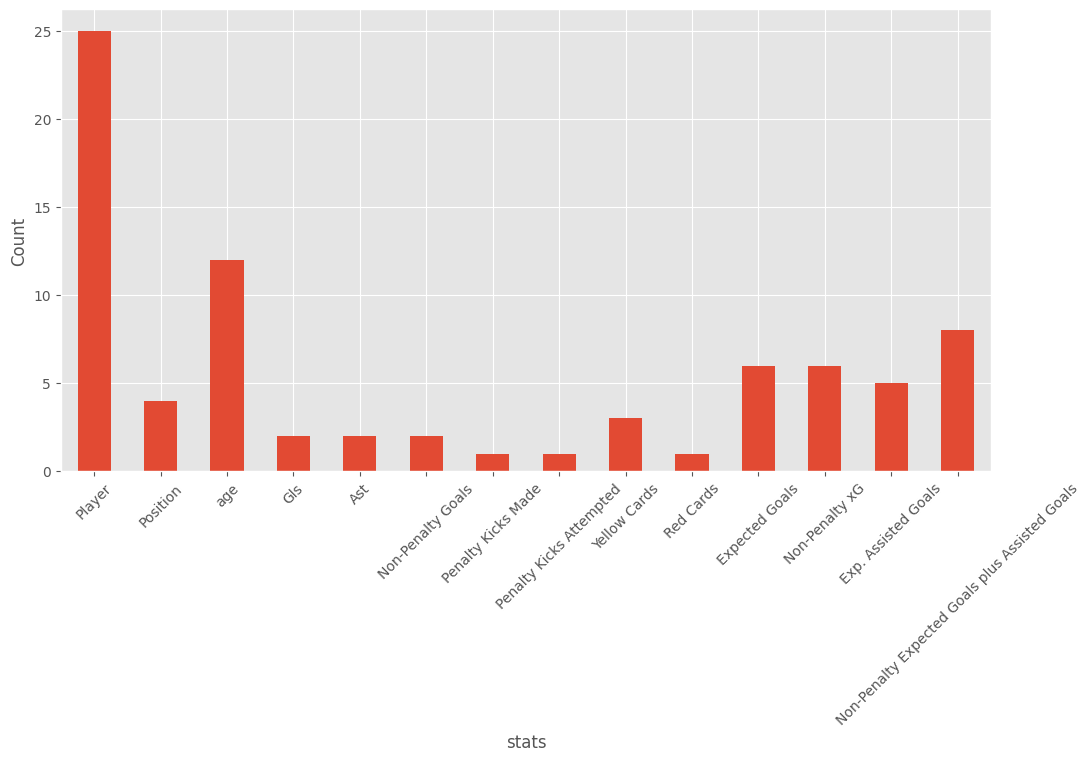

In [118]:
#@title Count of Variables

main.nunique()

#you can also plot
main.nunique().plot(kind="bar")
plt.xlabel("stats")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

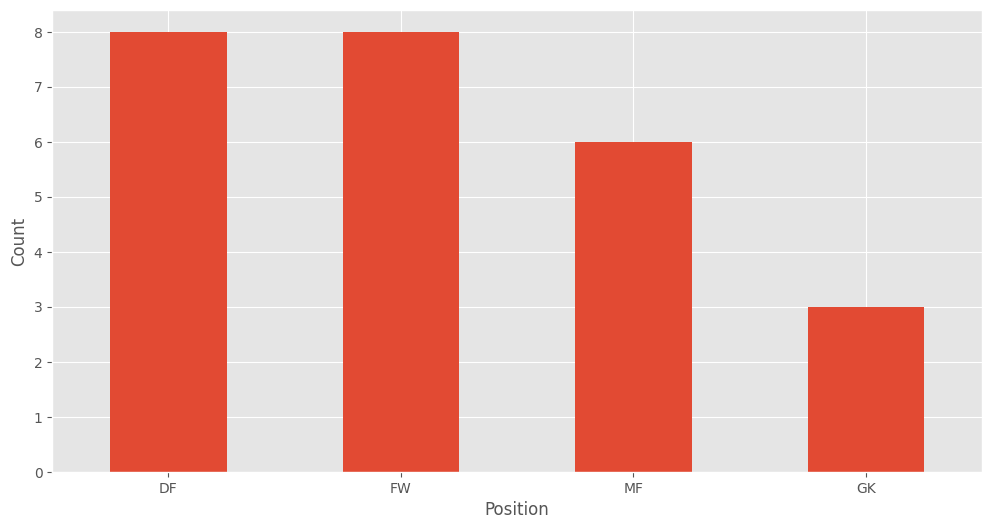

In [89]:
#@title Count of Football Positions
import pandas as pd
import matplotlib.pyplot as plt

# Generate value counts for the 'Position' column
value_counts = main['Position'].value_counts()

# Plot the value counts as a bar chart
value_counts.plot(kind="bar")
plt.xlabel("Position")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


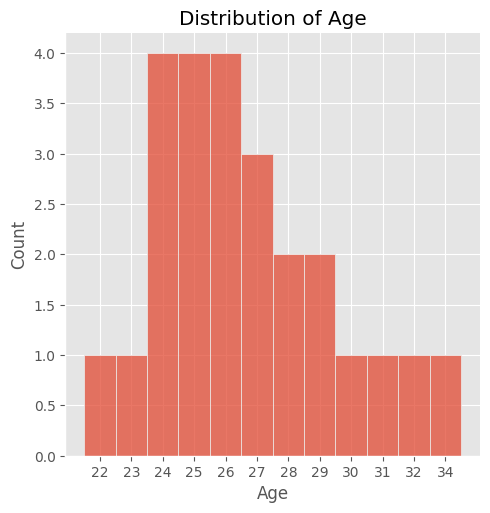

In [96]:
#@title Distribution of Age
import matplotlib.pyplot as plt
sns.displot(main['age'].sort_values(), bins=10)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age")
plt.show()


In [97]:
#@title Kurtosis and Skewness

print(f"Skewness: {main['age'].skew()}")
print(f"Kurtosis: {main['age'].kurt()}")

Skewness: 0.8076737270313702
Kurtosis: 0.3900338052303627


In [99]:
# Mean
print(f"Mean: {main['age'].mean()}")

# Median
print(f"Median: {main['age'].median()}")

Mean: 1.2101088905010514e+48
Median: 26.0


From this information we see how the distribution:

- does not follow a normal curve
- has kurtosis close to 0
- has asymmetry slightly skewed to the right: the distribution has a long tail on the right side and most of the data points are concentrated on the left side.

#Bivariate Analysis

This is helpful to find interesting relationships that show the influence of one varibale on the other.

A pairplot would return a full picture of all the relationships among the dataset's variables.

Despite computationally expensive, this can work out good if used with a relatively small dataset (few variables).


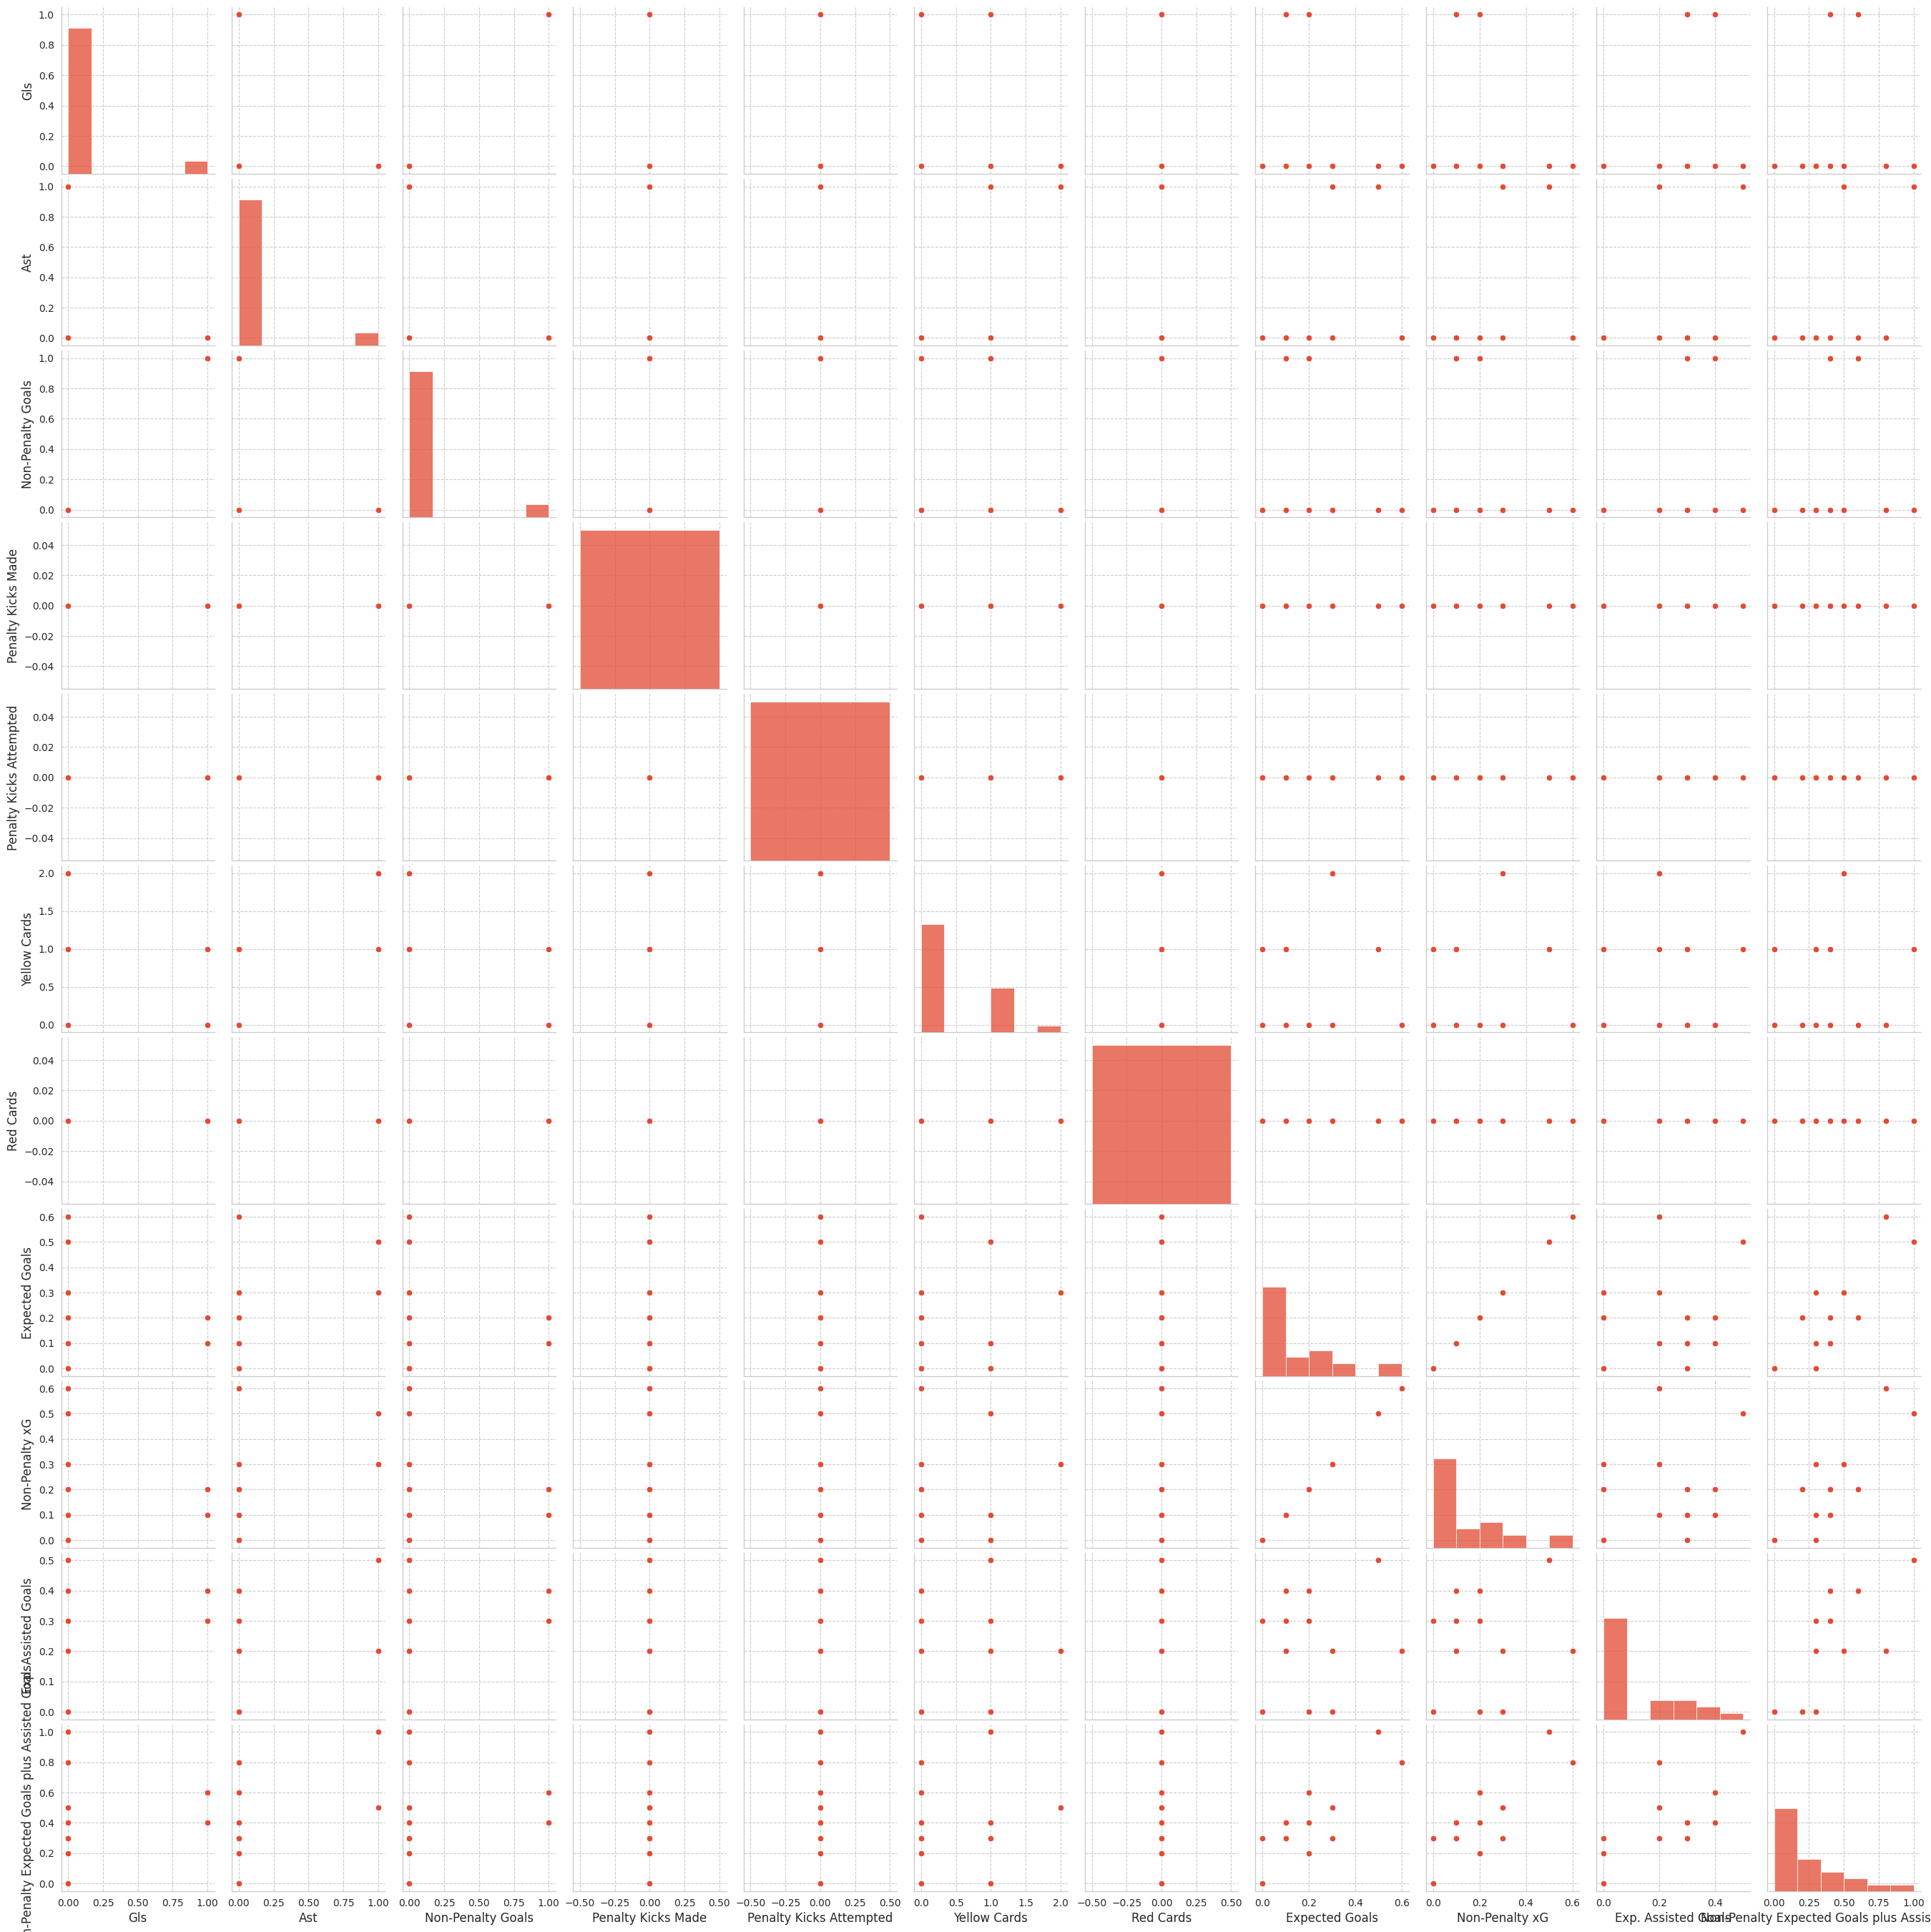

In [13]:
#@title Make a scatter plot for 5 specific columns (by column names)
import seaborn as sns

sns.pairplot(main)

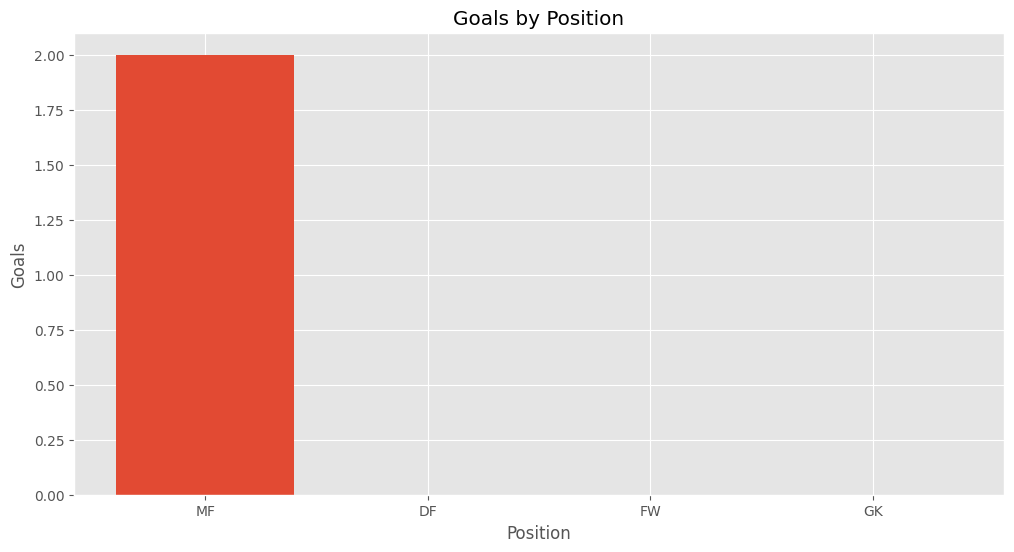

In [105]:
#@title Goals by Position (cumulative sum)
goals = main.groupby('Position')['Gls'].sum().reset_index()

# Sort by Goals
goals = goals.sort_values('Gls', ascending=False)

# Create a bar chart
plt.bar(goals['Position'], goals['Gls'])
plt.xlabel('Position')
plt.ylabel('Goals')
plt.title('Goals by Position')
plt.show()


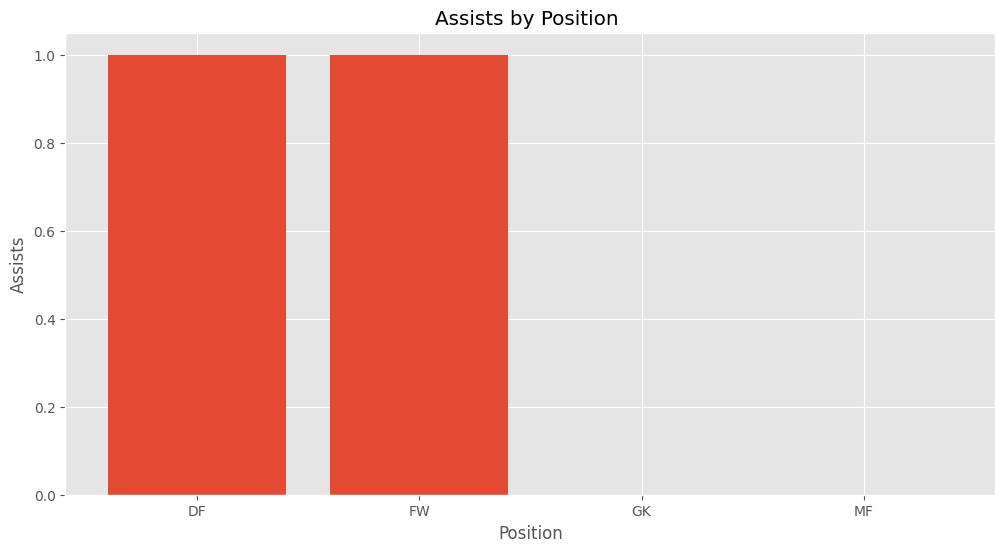

In [111]:
#@title Assists by Position (cumulative sum)
assists = main.groupby('Position')['Ast'].sum().reset_index()

# Sort by Goals
assists = assists.sort_values('Ast', ascending=False)

# Create a bar chart
plt.bar(assists['Position'], assists['Ast'])
plt.xlabel('Position')
plt.ylabel('Assists')
plt.title('Assists by Position ')
plt.show()


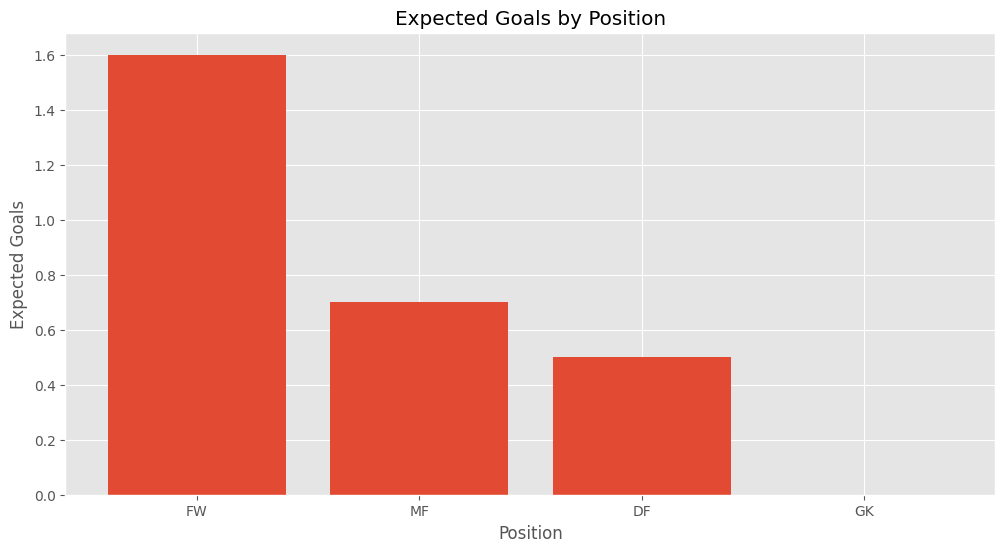

In [139]:
#@title Expected Goals by Position (cumulative sum)
xg = main.groupby('Position')['Expected Goals'].sum().reset_index()

# Sort by Goals
xg = xg.sort_values('Expected Goals', ascending=False)

# Create a bar chart
plt.bar(xg['Position'], xg['Expected Goals'])
plt.xlabel('Position')
plt.ylabel('Expected Goals')
plt.title('Expected Goals by Position')
plt.show()

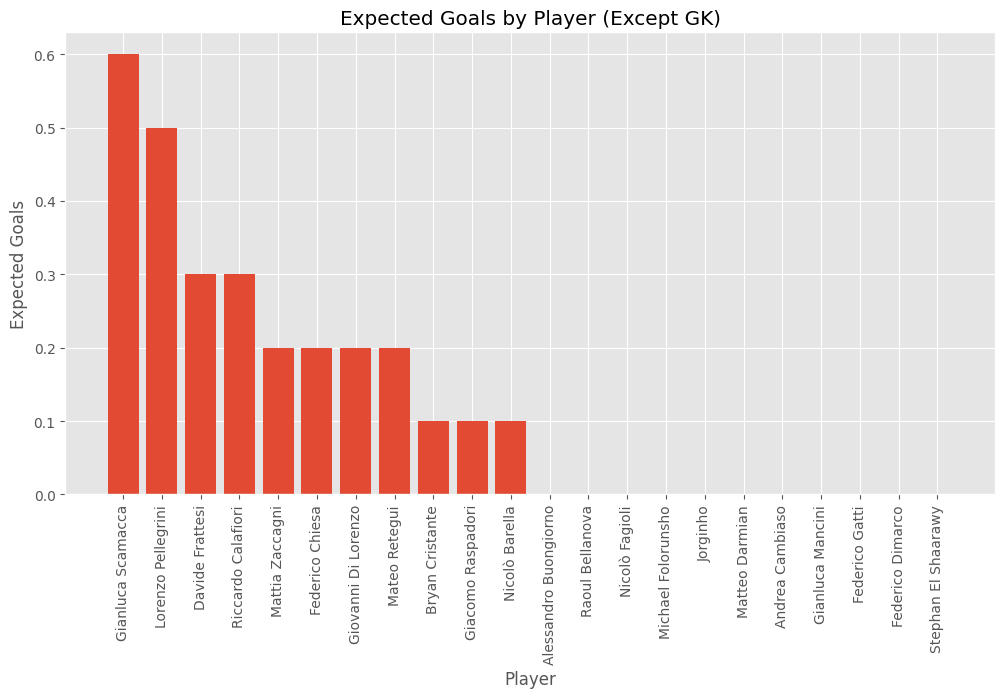

In [137]:
#@title Expected Goals by Player (cumulative sum)
non_gk_players = main[main['Position'] != 'GK']

xg_player = non_gk_players.groupby('Player')['Expected Goals'].sum().reset_index()

# Sort by Goals
xg_player = xg_player.sort_values('Expected Goals', ascending=False)

# Create a bar chart
plt.bar(xg_player['Player'], xg_player['Expected Goals'])
plt.xlabel('Player')
plt.ylabel('Expected Goals')
plt.title('Expected Goals by Player (Except GK)')
plt.xticks(rotation=90)
plt.show()


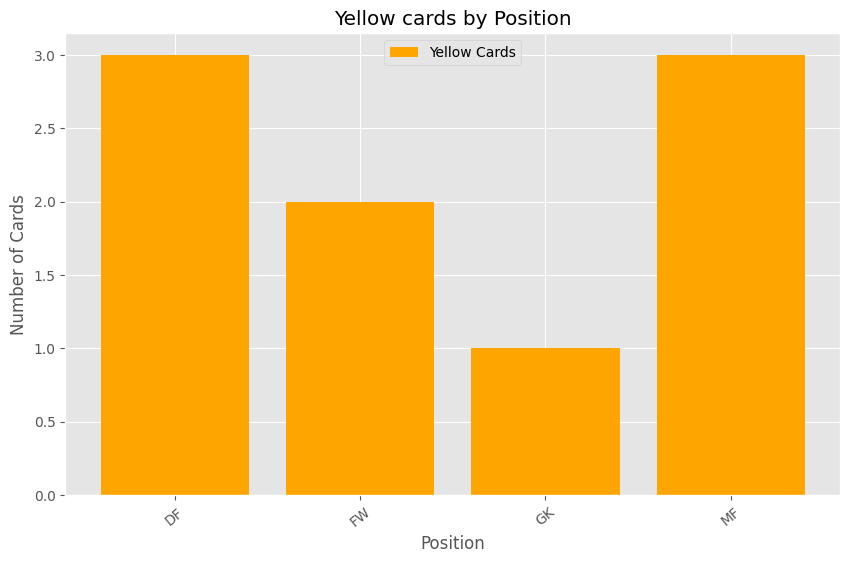

In [141]:
#@title Yellow Cards by Position (cumulative sum)

yellow_cards = main.groupby('Position')['Yellow Cards'].sum().reset_index()

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(yellow_cards['Position'], yellow_cards['Yellow Cards'], color="orange", label='Yellow Cards')

plt.xlabel('Position')
plt.ylabel('Number of Cards')
plt.title('Yellow cards by Position')
plt.xticks(rotation=40)
plt.legend()
plt.show()



##Heatmap
Heat maps help grasp which variables are strongly correlated with each other.

Albeit biased against the expected outcomes, this exercise allows us to detect:
- non-significant correlations (x<0.3)
- Low Correlations - **Yellow cards positively correlated to the number of assist performed by each Italian player (0.5)**
- Exreme Correlations (multicollinearity) - independent variables found engaging with a robust correlation relationship (x>0.8). It is necessary to steer away from these correlations as they are spurious.

##Note
To quickly inspect correlation, we relied on Spearman's coefficient to increase chances of steering away from potential outliers.
In fact, using Pearson's would have otherwise increased such chances.

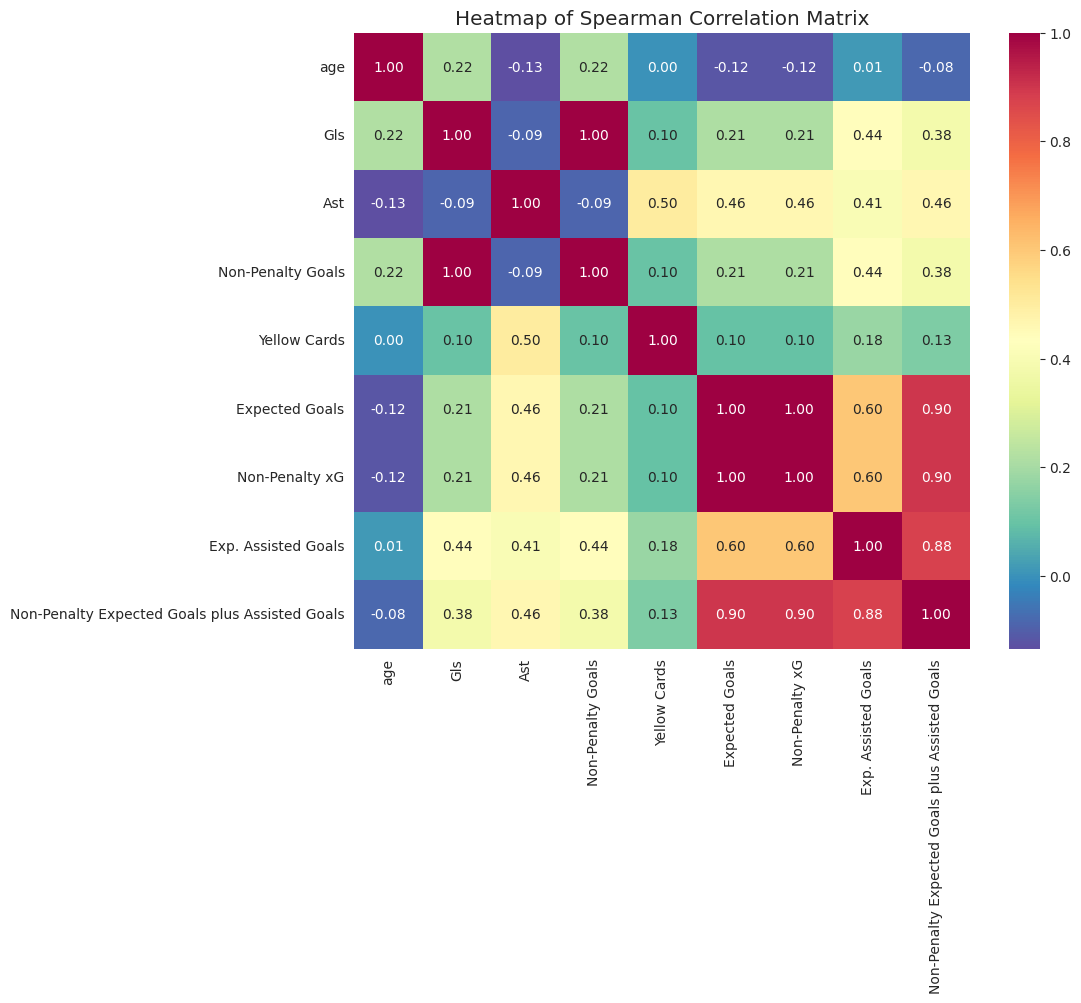

In [19]:
main = main.drop(columns=['Player', 'Position','Penalty Kicks Attempted','Penalty Kicks Made','Red Cards'])

# Compute the Spearman's rank correlation matrix
corrmat = main.corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(10, 8))
hm = sns.heatmap(corrmat,
                 cbar=True,
                 square=True,
                 fmt='.2f',
                 annot=True,  # to display the correlation values
                 annot_kws={'size': 10},
                 yticklabels=corrmat.columns,
                 xticklabels=corrmat.columns,
                 cmap="Spectral_r")

# Show the plot
plt.title('Heatmap of Spearman Correlation Matrix')
plt.show()

# Italy Team Stats

In the following section, we dive into in-depth data by following this approach:
1. Data mining - once scraped the tables from fbref, datasets are uploaded to the notebook. A pre-emptive and exhaustive data pre-processing is conducted before the upload due to the poor support from Python
2. Data wrangling - conversion of float into integers where necessary
3. Data visualization - inspection of potential relationships between categorical/numerical variable using catplots and scatterplots.

In [4]:
#@title Import Possession Dataset

possession = pd.read_excel('/content/Untitled spreadsheet.xlsx')

#replace all NaN values with 0
possession.fillna(0, inplace=True)

# Convert all float64 columns to integers
for column in possession.select_dtypes(include=['float64']).columns:
    possession[column] = possession[column].astype(int)

possession.head()

,Opponent,Poss,Touches,Touches in defensive penalty area,Touches in attacking penalty area,Attacking touches,Successful take-ons (dribbles),Times tackled,Carries,Total distance carried (in meters),Carries into final third,Carries into penalty area,Miscontrols (unsuccessful touches),Dispossessed (times lost possession),Passes received
0,Albania,68,912,42,30,14,9,4,765,3302,20,3,7,4,769
1,Spain,43,570,84,11,6,2,4,402,1868,5,3,11,12,381
2,Croatia,54,691,41,25,10,5,5,520,2222,12,3,8,10,513
3,Switzerland,50,647,67,12,15,7,5,487,2735,32,2,8,4,472


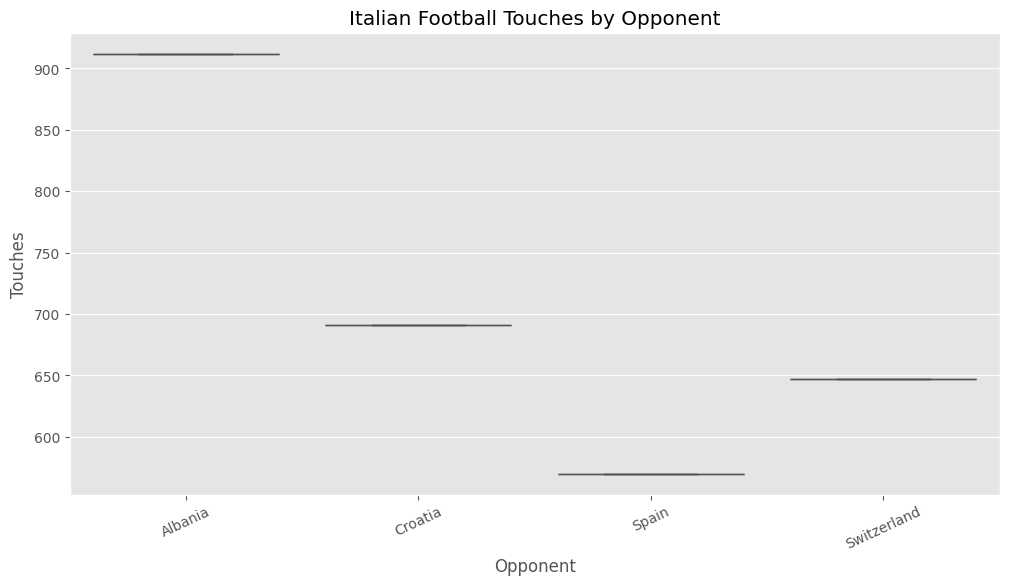

In [3]:
#@title Italian Football Touches by Opponent

grouped_opponents = possession.groupby('Opponent')['Touches'].sum().reset_index()

# Creating a boxplot using seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x="Opponent", y="Touches", data=grouped_opponents)
plt.title("Italian Football Touches by Opponent")
plt.xticks(rotation=25)
plt.show()

In [21]:
#@title Miscontrols (unsuccessful touches)	vs Dispossessed (times lost possession)	Passes by Opponent Team
fig = px.scatter(
    possession,
    x='Miscontrols (unsuccessful touches)',
    y='Dispossessed (times lost possession)',
    color='Opponent',
    size='Touches',  # Use the 'Carries' column to control the marker size
    size_max=60,  # Set the maximum size of the markers
    title='Unsuccessful touches vs Lost possession by Opponent Team',
    labels={
        'Miscontrols (unsuccessful touches)': 'Unsuccessful touches',
        'Dispossessed (times lost possession)': 'Lost possession'
    },
    width=800,
    height=600,
    color_discrete_sequence=px.colors.qualitative.Set1
)
# Add annotations below the title
fig.add_annotation(
    text="Source - fbref.com",
    xref="paper", yref="paper",
    x=0.85, y=-0.18,  # Adjust the position below the title
    showarrow=False,
    font=dict(size=12)
)

fig.add_annotation(
    text="* Bubble size - cum sum of Touches",
    xref="paper", yref="paper",
    x=0.15, y=-0.18,  # Adjust the position below the title
    showarrow=False,
    font=dict(size=12)
)
fig.show()

In [17]:
#@title Attacking vs Defensive Touches by Opponent Team
import plotly.express as px

fig = px.scatter(possession,
                 x='Touches in defensive penalty area',
                 y='Touches in attacking penalty area',
                 color='Opponent',
                 size='Touches',  # Use a valid column name for size
                 size_max=60,  # Adjust size_max to increase the dot size
                 title='Attacking vs Defensive Touches by Opponent Team',
                 labels={'Touches in defensive penalty area': 'Defensive Area Touches',
                         'Touches in attacking penalty area': 'Attacking Area Touches'},
                 width=800,
                 height=600,
                 color_discrete_sequence=px.colors.qualitative.Set1)

# Add annotations below the title
fig.add_annotation(
    text="Source - fbref.com",
    xref="paper", yref="paper",
    x=0.85, y=-0.18,  # Adjust the position below the title
    showarrow=False,
    font=dict(size=12)
)

fig.add_annotation(
    text="* Bubble size - cum sum of Touches",
    xref="paper", yref="paper",
    x=0.15, y=-0.18,  # Adjust the position below the title
    showarrow=False,
    font=dict(size=12)
)

fig.show()


In [20]:
#@title Carries into final third vs	Carries into penalty area by Opponent Team
import plotly.express as px

fig = px.scatter(possession,
                 x='Carries into final third',
                 y='Carries into penalty area',
                 color='Opponent',
                 size='Carries',  # Use a valid column name for size
                 size_max=60,  # Adjust size_max to increase the dot size
                 title='Carries into final third vs	Carries into penalty area by Opponent Team',
                 width=800,
                 height=600,
                 color_discrete_sequence=px.colors.qualitative.Set1)

# Add annotations below the title
fig.add_annotation(
    text="Source - fbref.com",
    xref="paper", yref="paper",
    x=0.85, y=-0.18,  # Adjust the position below the title
    showarrow=False,
    font=dict(size=12)
)

fig.add_annotation(
    text="* Bubble size - cum sum of Carries",
    xref="paper", yref="paper",
    x=0.15, y=-0.18,  # Adjust the position below the title
    showarrow=False,
    font=dict(size=12)
)

fig.show()


In [22]:
#@title Import Misc Dataset

misc = pd.read_excel('/content/misc.xlsx')

#replace all NaN values with 0
misc.fillna(0, inplace=True)

# Convert all float64 columns to integers
for column in misc.select_dtypes(include=['float64']).columns:
    misc[column] = misc[column].astype(int)

misc.head()

,Opponent,Yellow Cards,Red Cards,Fouls Committed,Fouls Drawn,Offsides,Crosses,Interceptions,Tackles Won,Ball Recoveries
0,Albania,2,0,7,7,2,15,15,5,33
1,Spain,2,0,14,16,0,12,9,16,44
2,Croatia,3,0,6,17,2,24,1,4,37
3,Switzerland,3,0,15,9,1,20,8,10,32


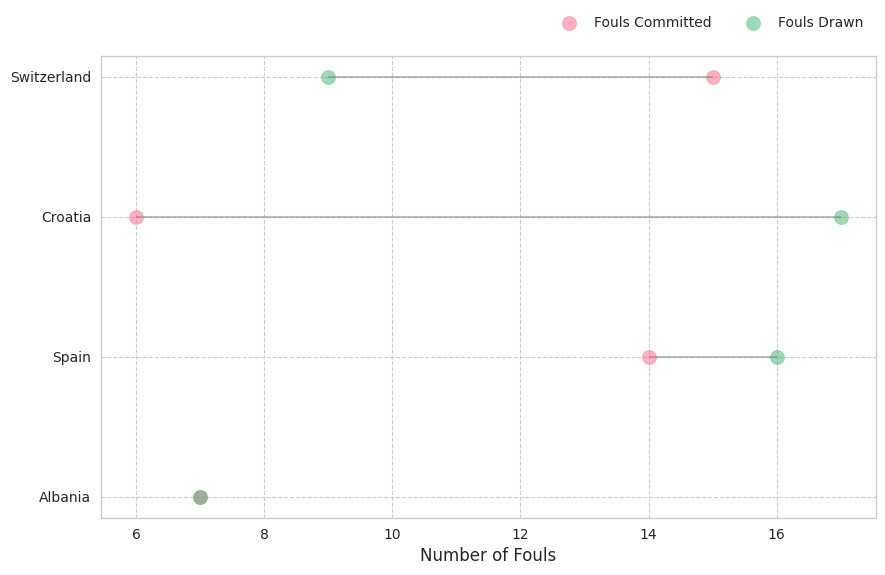

In [42]:
#@title Fouls Committed vs Fouls Drawn by Team Opponent
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the background color to white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Create the lollipop chart
ax.hlines(y=misc["Opponent"], xmin=misc["Fouls Committed"], xmax=misc["Fouls Drawn"], color='gray', alpha=0.5)
ax.scatter(misc["Fouls Committed"], misc["Opponent"], color='#ff638480', label='Fouls Committed', s=100)
ax.scatter(misc["Fouls Drawn"], misc["Opponent"], color='#3cb37180', label='Fouls Drawn', s=100)

# Add labels and title
ax.set_xlabel("Number of Fouls")

# Apply Seaborn style for the grid
sns.set_style("whitegrid", {'grid.linestyle': '--'})

# Show the legend
ax.legend()
plt.legend(ncol=2, bbox_to_anchor=(1, 1.03), loc="lower right", frameon=False)

# Save the figure
plt.savefig("Lollypop.png", facecolor=fig.get_facecolor())

# Show the plot
plt.show()


In [61]:
#@title Import Defense
defense = pd.read_excel('/content/defense.xlsx')

# Replace all NaN values with 0
defense = defense.fillna(0)

# Convert all float64 columns to integers
for column in defense.select_dtypes(include=['float64']).columns:
    defense[column] = defense[column].astype(int)

# Data transformation
defense['Tackles Lost'] = defense.apply(lambda row: row['Tackles'] - row['Tackles Won'] if row['Tackles'] > 0 else 0, axis=1)

defense

,Opponent,Tackles,Tackles Won,Dribbles Challenged,Challenges Lost,Shots Blocked,Passes Blocked,Tackles Lost
0,Albania,9,5,7,2,2,6,4
1,Spain,32,16,32,14,4,5,16
2,Croatia,13,4,13,9,1,7,9
3,Switzerland,12,10,10,5,6,4,2


In [56]:
#@title Tackles Won vs	Tackles Lost by Opponent Team by Opponent Team
import plotly.express as px

fig = px.scatter(defense,
                 x='Tackles Won',
                 y='Tackles Lost',
                 labels={'Tackles Won': 'Won', 'Tackles Lost': 'Lost'},
                 color='Opponent',
                 size='Tackles',  # Use a valid column name for size
                 size_max=60,  # Adjust size_max to increase the dot size
                 title='Tackles Won vs	Tackles Lost by Opponent Team',
                 width=800,
                 height=600,
                 color_discrete_sequence=px.colors.qualitative.Set1)

# Add annotations below the title
fig.add_annotation(
    text="Source - fbref.com",
    xref="paper", yref="paper",
    x=0.85, y=-0.18,  # Adjust the position below the title
    showarrow=False,
    font=dict(size=12)
)

fig.add_annotation(
    text="* Bubble size - cum sum of Tackles",
    xref="paper", yref="paper",
    x=0.15, y=-0.18,  # Adjust the position below the title
    showarrow=False,
    font=dict(size=12)
)

fig.show()


In [2]:
#@title Import Passes Dataset

passes = pd.read_excel('/content/passes.xlsx')

#replace all NaN values with 0
passes.fillna(0, inplace=True)

# Convert all float64 columns to integers
for column in passes.select_dtypes(include=['float64']).columns:
    passes[column] = passes[column].astype(int)


# Data transformation
passes['Passes Missed'] = passes.apply(lambda row: row['Passes Attempted'] - row['Passes Completed'] if row['Passes Attempted'] > 0 else 0, axis=1)

passes.head()

,Opponent,Passes Attempted,Passes from Free Kicks,Long Passes,Corner Kicks,Passes Completed,Passes Missed
0,Albania,846,8,2,5,772,74
1,Spain,470,16,4,2,384,86
2,Croatia,616,17,2,11,517,99
3,Switzerland,561,8,1,6,478,83


In [3]:
#@title Passes Completed vs	Passes Missed by Opponent team
import plotly.express as px

fig = px.scatter(passes,
                 x='Passes Completed',
                 y='Passes Missed',
                 labels={'Passes Completed': 'Completed', 'Passes Missed': 'Missed'},
                 color='Opponent',
                 size='Passes Attempted',  # Use a valid column name for size
                 size_max=60,  # Adjust size_max to increase the dot size
                 title='Passes Completed vs Missed by Opponent Team',
                 width=800,
                 height=600,
                 color_discrete_sequence=px.colors.qualitative.Set1)

# Add annotations below the title
fig.add_annotation(
    text="Source - fbref.com",
    xref="paper", yref="paper",
    x=0.85, y=-0.18,  # Adjust the position below the title
    showarrow=False,
    font=dict(size=12)
)

fig.add_annotation(
    text="* Bubble size - cum sum of Passes Attempted",
    xref="paper", yref="paper",
    x=0.15, y=-0.18,  # Adjust the position below the title
    showarrow=False,
    font=dict(size=12)
)

fig.show()


In [4]:
#@title Import Shootings Dataset

shoot = pd.read_excel('/content/shootings.xlsx')

#replace all NaN values with 0
shoot.fillna(0, inplace=True)

shoot.head()

,Opponent,Goals,Shots Total,Shots on Target,Goals per shot,Goals per shot on target,Average Shot Distance,Expected Goals
0,Albania,2,17,5,0.12,0.40,14.7,1.5
1,Spain,0,4,1,0.00,0.00,17.7,0.2
2,Croatia,1,12,3,0.08,0.33,15.2,0.9
3,Switzerland,0,11,1,0.00,0.00,20.5,0.7


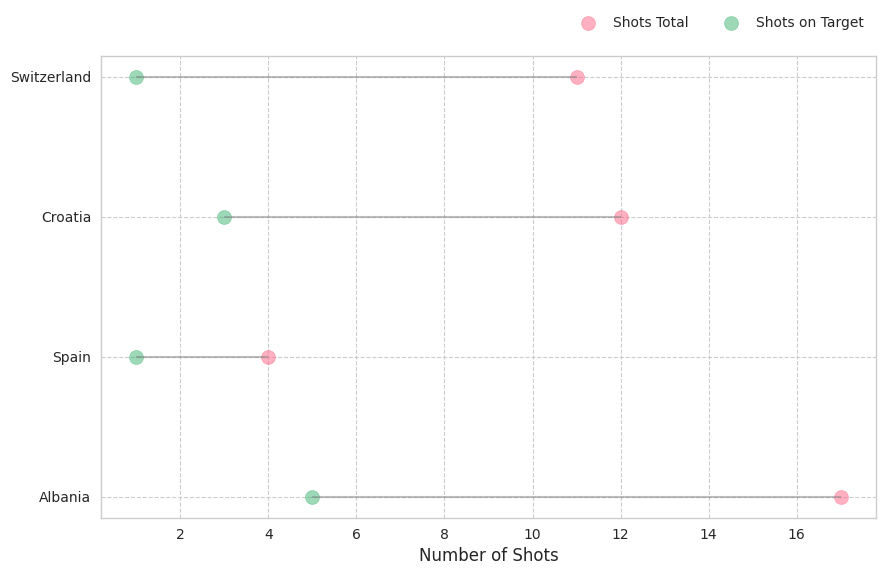

In [7]:
#@title Shots Total	vs Shots on Target by Team Opponent

fig, ax = plt.subplots(figsize=(10, 6))

# Set the background color to white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Create the lollipop chart
ax.hlines(y=shoot["Opponent"], xmin=shoot["Shots Total"], xmax=shoot["Shots on Target"], color='gray', alpha=0.5)
ax.scatter(shoot["Shots Total"], shoot["Opponent"], color='#ff638480', label='Shots Total', s=100)
ax.scatter(shoot["Shots on Target"], shoot["Opponent"], color='#3cb37180', label='Shots on Target', s=100)

# Add labels and title
ax.set_xlabel("Number of Shots")

# Apply Seaborn style for the grid
sns.set_style("whitegrid", {'grid.linestyle': '--'})

# Show the legend
ax.legend()
plt.legend(ncol=2, bbox_to_anchor=(1, 1.03), loc="lower right", frameon=False)

# Save the figure
plt.savefig("shots.png", facecolor=fig.get_facecolor())

# Show the plot
plt.show()


In [9]:
#@title Goals per shot vs	Goals per shot on target by Opponent team
import plotly.express as px

fig = px.scatter(shoot,
                 x='Goals per shot',
                 y='Goals per shot on target',
                 color='Opponent',
                 size='Expected Goals',  # Use a valid column name for size
                 size_max=60,  # Adjust size_max to increase the dot size
                 title='Goals per shot vs	Goals per shot on target by Opponent team',
                 width=800,
                 height=600,
                 color_discrete_sequence=px.colors.qualitative.Set1)

# Add annotations below the title
fig.add_annotation(
    text="Source - fbref.com",
    xref="paper", yref="paper",
    x=0.85, y=-0.18,  # Adjust the position below the title
    showarrow=False,
    font=dict(size=12)
)

fig.add_annotation(
    text="* Bubble size - Expected Goals",
    xref="paper", yref="paper",
    x=0.15, y=-0.18,  # Adjust the position below the title
    showarrow=False,
    font=dict(size=12)
)

fig.show()
